In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
covid_df = pd.read_csv('owid_covid_data.csv')

pd.options.display.max_rows = 4000

def missing_report_gen(covid_df):
    missing_values = covid_df.isnull().sum()
    missing_percent = (missing_values / len(covid_df)) * 100
    missing_report = pd.DataFrame({'Missing Values': missing_values, 'Percent Missing': missing_percent})
    missing_report = missing_report[missing_report['Missing Values'] > 0]
    
    return missing_report

missing_report = missing_report_gen(covid_df)
missing_report

,Missing Values,Percent Missing
continent,26525,6.176721
total_cases,17631,4.105627
new_cases,19276,4.488689
new_cases_smoothed,20506,4.775111
total_deaths,17631,4.105627
new_deaths,18827,4.384133
new_deaths_smoothed,20057,4.670555
total_cases_per_million,17631,4.105627
new_cases_per_million,19276,4.488689
new_cases_smoothed_per_million,20506,4.775111


### Data Preprocessing
---

In [32]:
# Removing columns 
high_missing_cols = covid_df.columns[covid_df.isnull().mean() > 0.90]
medium_missing_cols = covid_df.columns[(covid_df.isnull().mean() > 0.50) & (covid_df.isnull().mean() <= 0.90)]

covid_df_clean = covid_df.drop(columns=high_missing_cols).drop(columns=medium_missing_cols)

missing_report_clean = missing_report_gen(covid_df_clean)
missing_report_clean

,Missing Values,Percent Missing
continent,26525,6.176721
total_cases,17631,4.105627
new_cases,19276,4.488689
new_cases_smoothed,20506,4.775111
total_deaths,17631,4.105627
new_deaths,18827,4.384133
new_deaths_smoothed,20057,4.670555
total_cases_per_million,17631,4.105627
new_cases_per_million,19276,4.488689
new_cases_smoothed_per_million,20506,4.775111


#### Feature Selection and Derivation

In [33]:
covid_df_clean['case_fatality_rate'] = covid_df_clean['total_deaths'] / covid_df_clean['total_cases']
covid_df_clean['log_total_cases'] = np.log1p(covid_df_clean['total_cases'])
covid_df_clean['log_total_deaths'] = np.log1p(covid_df_clean['total_deaths'])

### Exploratory Data Analysis
---

#### Visualizations

        total_cases  total_deaths  gdp_per_capita  life_expectancy
count  4.118040e+05  4.118040e+05   328292.000000    390299.000000
mean   7.365292e+06  8.125957e+04    18904.182986        73.702098
std    4.477582e+07  4.411901e+05    19829.578099         7.387914
min    0.000000e+00  0.000000e+00      661.240000        53.280000
25%    6.280750e+03  4.300000e+01     4227.630000        69.500000
50%    6.365300e+04  7.990000e+02    12294.876000        75.050000
75%    7.582720e+05  9.574000e+03    27216.445000        79.460000
max    7.758668e+08  7.057132e+06   116935.600000        86.750000


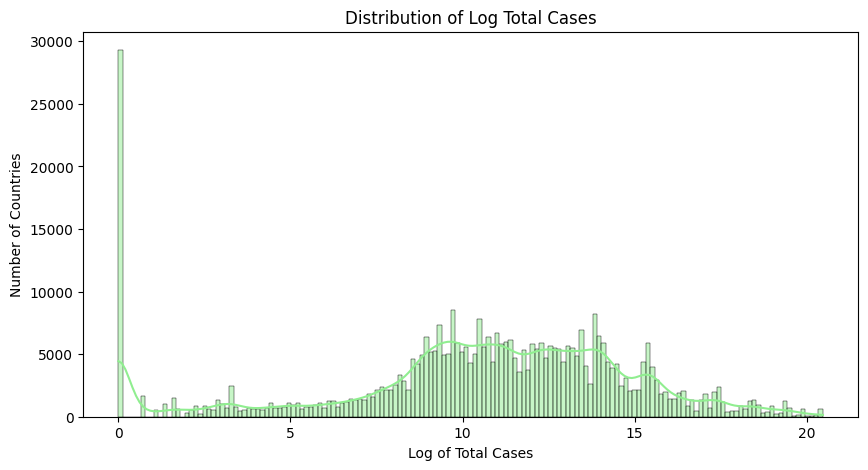

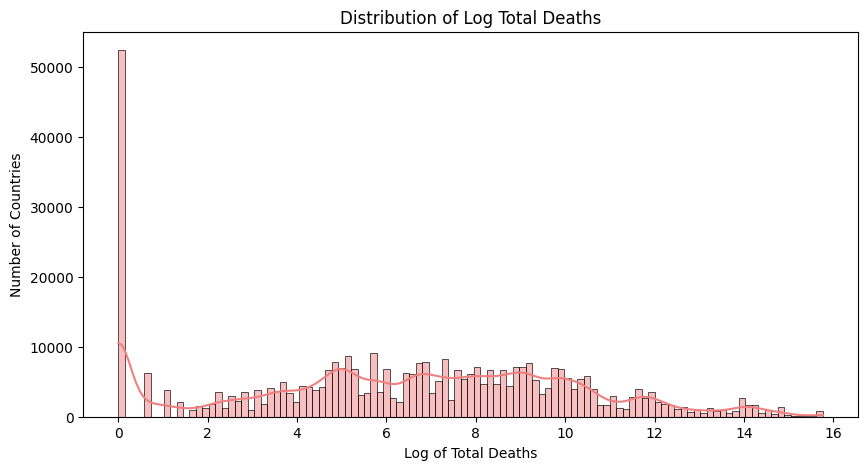

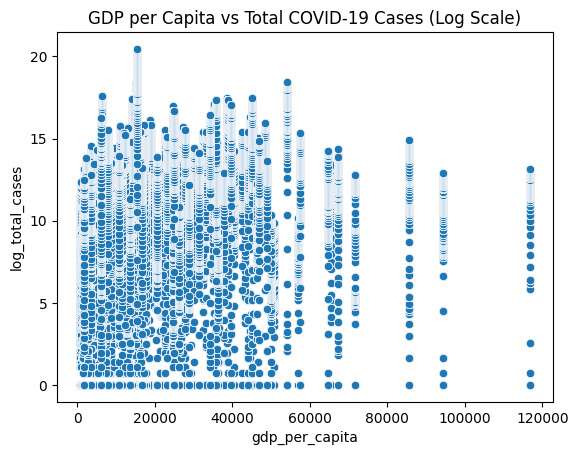

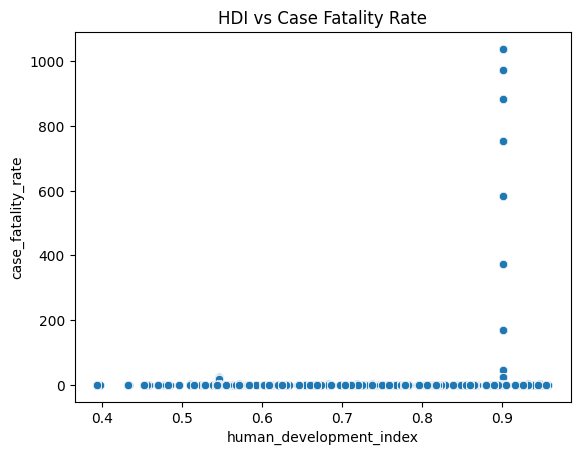

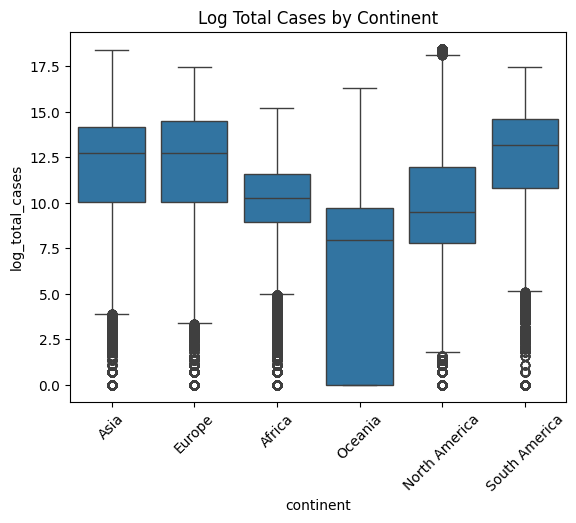

In [ ]:
# Summary statistics for key variables
print(covid_df_clean[['total_cases', 'total_deaths', 'gdp_per_capita', 'life_expectancy']].describe())

# Histograms for total_cases and total_deaths
plt.figure(figsize=(10, 5))
sns.histplot(covid_df_clean['log_total_cases'], kde=True, color='lightgreen')
plt.title('Distribution of Log Total Cases')
plt.xlabel('Log of Total Cases')
plt.ylabel('Number of Countries')
plt.tight_layout
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(covid_df_clean['log_total_deaths'], kde=True, color='lightcoral')
plt.title('Distribution of Log Total Deaths')
plt.xlabel('Log of Total Deaths')
plt.ylabel('Number of Countries')
plt.tight_layout
plt.show()

# Scatterplots
sns.scatterplot(x='gdp_per_capita', y='log_total_cases', data=covid_df_clean)
plt.title('GDP per Capita vs Total COVID-19 Cases (Log Scale)')
plt.show()

sns.scatterplot(x='human_development_index', y='case_fatality_rate', data=covid_df_clean)
plt.title('HDI vs Case Fatality Rate')
plt.show()


# Boxplot for total_cases by continent
sns.boxplot(x='continent', y='log_total_cases', data=covid_df_clean)
plt.xticks(rotation=45)
plt.title('Log Total Cases by Continent')
plt.show()


### Correlation Analysis

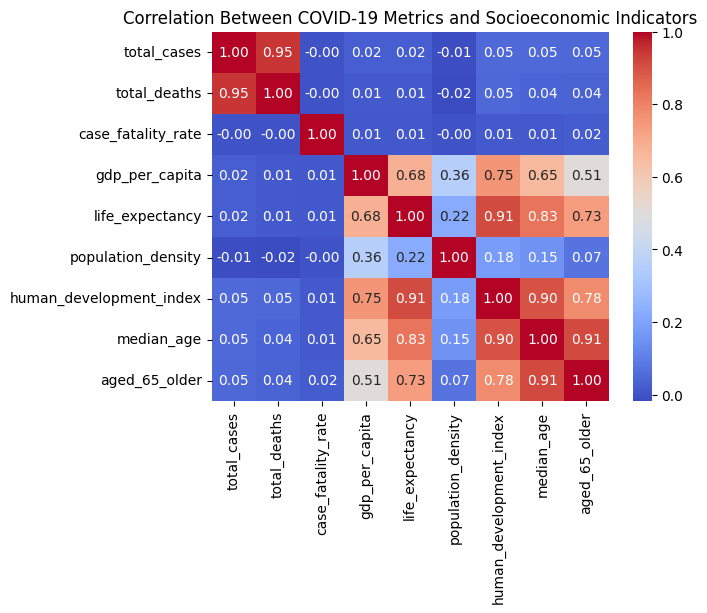

In [55]:
corr_vars = [
    'total_cases', 'total_deaths', 'case_fatality_rate',
    'gdp_per_capita', 'life_expectancy', 'population_density',
    'human_development_index', 'median_age', 'aged_65_older'
]

sns.heatmap(covid_df_clean[corr_vars].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between COVID-19 Metrics and Socioeconomic Indicators')
plt.show()